<a href="https://colab.research.google.com/github/Issey2023/Prediction-of-Product-Sales/blob/main/project_1_part_5__core_completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prediction of Product Sales
- Author: Ismaa-eel Hendricks

##Loading Data


In [ ]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Use Pandas to read the sales prediction data set into Google Colab.
fpath = "/content/drive/MyDrive/coding dojo week 6/sales_predictions_2023.csv"

df_sales = pd.read_csv(fpath)

In [ ]:
df_sales_2 = df_sales.copy()

In [ ]:
#Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
df_sales.info()

df_sales.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##Data Cleaning

In [ ]:
#1) How many rows and columns?
df_sales.shape

(8523, 12)

8523 rows
12 columns

In [ ]:
#2) What are the datatypes of each variable?
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Outlet Location Type and Outlet Identifier can be converted to numeric datatypes

In [ ]:
#Converting Outlet_Identifier column to int
df_sales['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df_sales['Outlet_Identifier'] = df_sales['Outlet_Identifier'].str.replace('OUT', '')
df_sales['Outlet_Identifier'].value_counts()

027    935
013    932
049    930
046    930
035    930
045    929
018    928
017    926
010    555
019    528
Name: Outlet_Identifier, dtype: int64

In [ ]:
df_sales['Outlet_Identifier'] = df_sales['Outlet_Identifier'].astype(int)
df_sales['Outlet_Identifier'].dtypes

dtype('int64')

In [ ]:
#Converting Outlet_Location_Type column to int
df_sales['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df_sales['Outlet_Location_Type'] = df_sales['Outlet_Location_Type'].str.replace('Tier ', '')
df_sales['Outlet_Location_Type'].value_counts()

3    3350
2    2785
1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df_sales['Outlet_Location_Type'] = df_sales['Outlet_Location_Type'].astype(int)
df_sales['Outlet_Location_Type'].dtypes

dtype('int64')

In [ ]:
#3) Are there duplicates? If so, drop any duplicates.
duplicated_rows = df_sales.duplicated()
duplicated_rows.sum()

0

There are no duplicate rows.

In [ ]:
#4) Identify missing values.
missing_values = df_sales.isna().sum()
missing_values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

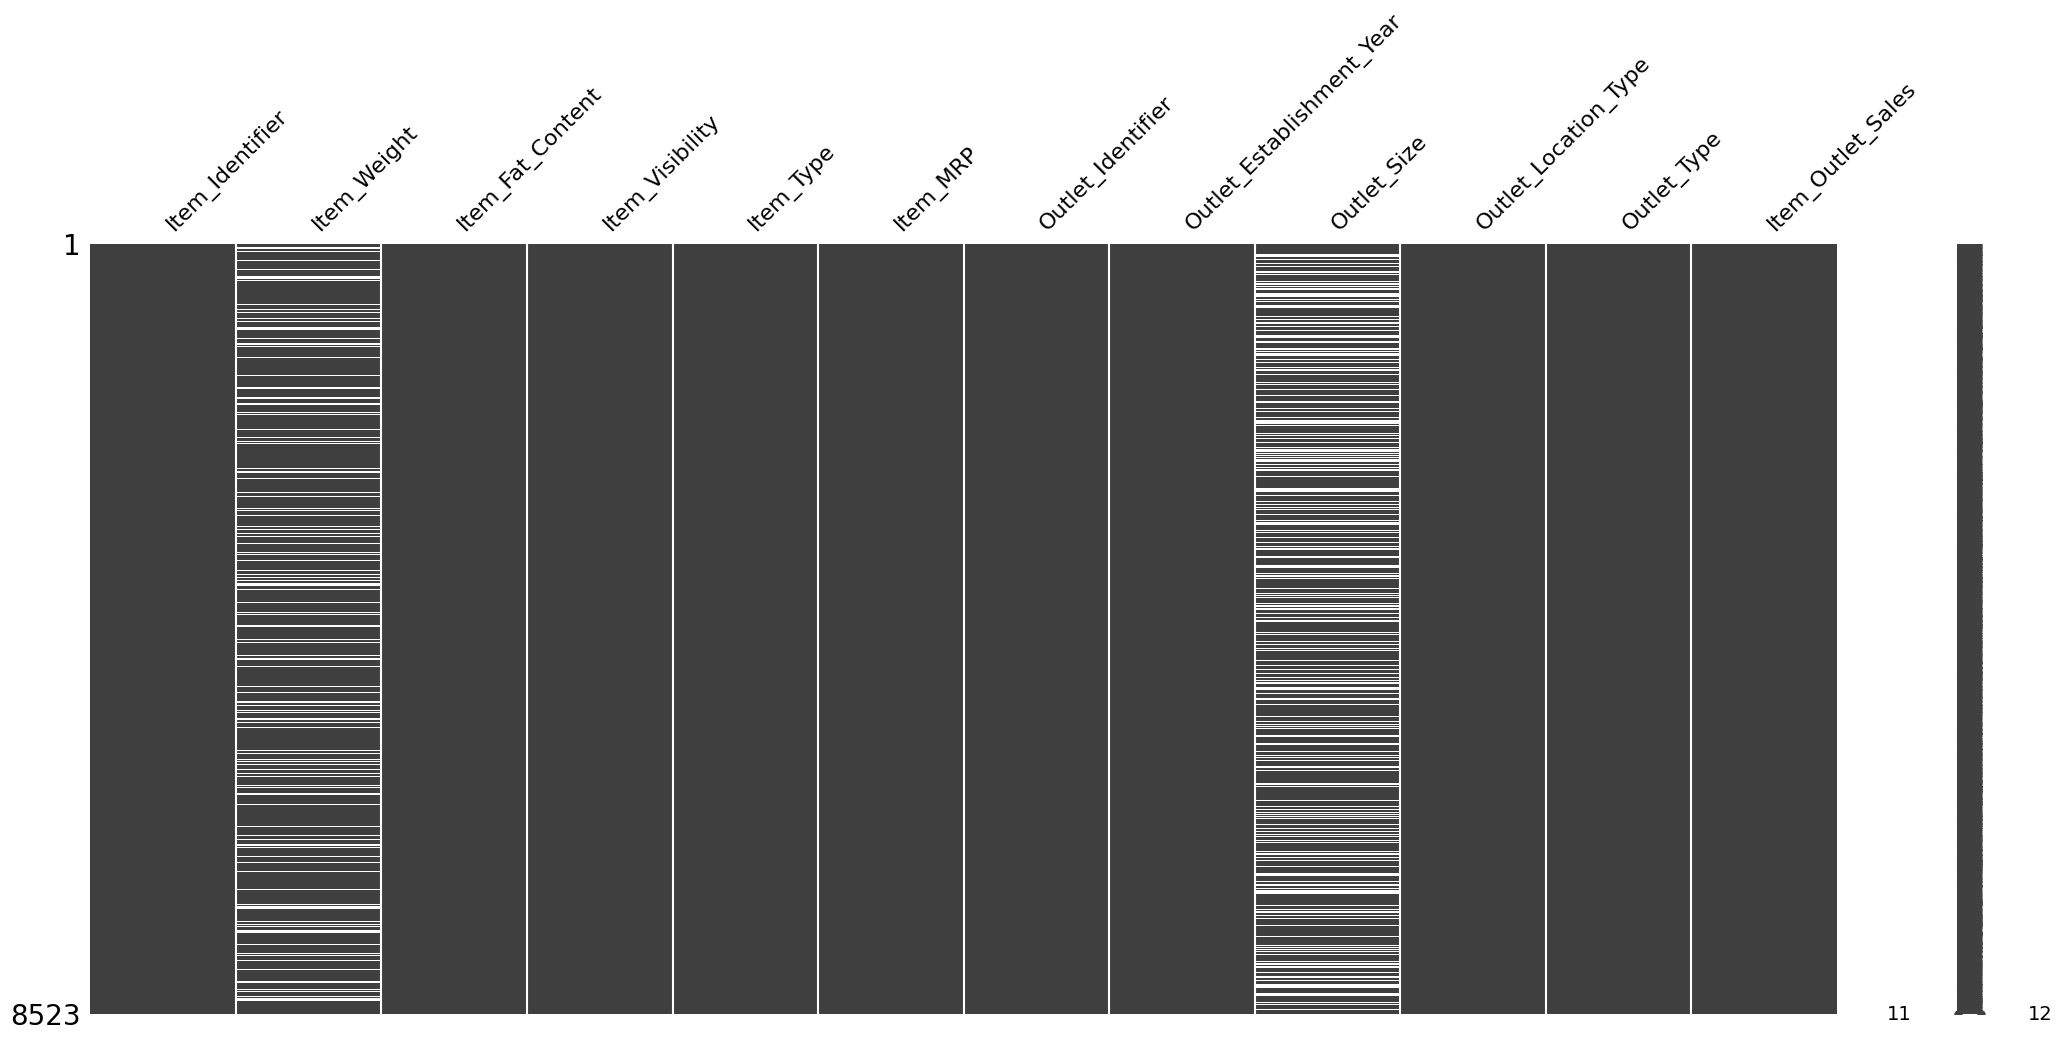

In [ ]:
msno.matrix(df_sales);

In [ ]:
#Address the missing values by using a placeholder value.
df_sales['Item_Weight'] = df_sales['Item_Weight'].fillna(-1)

df_sales['Outlet_Size'] = df_sales['Outlet_Size'].fillna("MISSING")


In [ ]:
#6) Confirm that there are no missing values after addressing them.
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
obj_columns = df_sales.select_dtypes('object').columns
obj_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Size',
       'Outlet_Type'],
      dtype='object')

In [ ]:
#Excluding Item_Identifier as that should be the indexing column
obj_columns = obj_columns[1:]
obj_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Type'], dtype='object')

In [ ]:
df_sales[obj_columns].nunique()

Item_Fat_Content     5
Item_Type           16
Outlet_Size          4
Outlet_Type          4
dtype: int64

In [ ]:
#Check value counts and correct inconsistencies
# loop through the list of string columns
for i in obj_columns:
  # print the value counts for the column
  print(f"{i}:")
  print(df_sales[i].value_counts())
  # Print an empty line for readability
  print ('\n')

Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Size:
Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


Outlet_Type:
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64




Based on the info above, Item_Fat_Content is the only feature/column with data inconsistencies

In [ ]:
#Correcting data inconsistencies in Item_Fat_Content column
rep_vals = {"LF": "Low Fat", "reg" : "Regular", "low fat" : "Low Fat"}
df_sales['Item_Fat_Content'] = df_sales['Item_Fat_Content'].replace(rep_vals)
df_sales['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
num_cols = num_columns = df_sales.select_dtypes('number').columns
num_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
df_sales['Item_Weight'].describe()

count    8523.000000
mean       10.478936
std         6.720742
min        -1.000000
25%         6.650000
50%        11.000000
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [ ]:
#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
for i in num_cols:
  print(f"{i}:")
  print(df_sales[i].describe().loc[['min', 'max', 'mean']])
  print ('\n')

Item_Weight:
min     -1.000000
max     21.350000
mean    10.478936
Name: Item_Weight, dtype: float64


Item_Visibility:
min     0.000000
max     0.328391
mean    0.066132
Name: Item_Visibility, dtype: float64


Item_MRP:
min      31.290000
max     266.888400
mean    140.992782
Name: Item_MRP, dtype: float64


Outlet_Identifier:
min     10.000000
max     49.000000
mean    29.108765
Name: Outlet_Identifier, dtype: float64


Outlet_Establishment_Year:
min     1985.000000
max     2009.000000
mean    1997.831867
Name: Outlet_Establishment_Year, dtype: float64


Outlet_Location_Type:
min     1.000000
max     3.000000
mean    2.112871
Name: Outlet_Location_Type, dtype: float64


Item_Outlet_Sales:
min        33.290000
max     13086.964800
mean     2181.288914
Name: Item_Outlet_Sales, dtype: float64




##Exploratory Data Analysis

In [ ]:
df_sales.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type           int64
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

1. Histograms to view the distributions of numerical features in your dataset

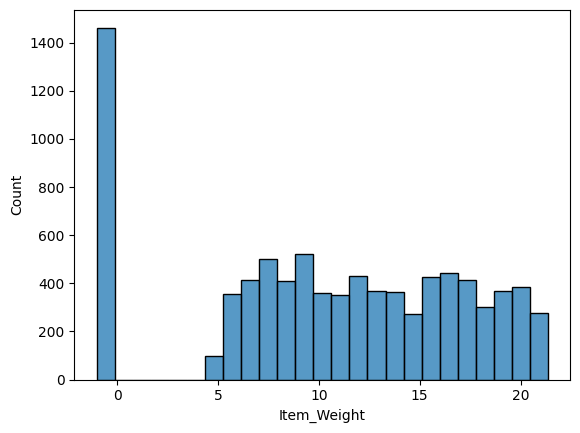

In [ ]:
ax = sns.histplot(data=df_sales, x='Item_Weight')

Interpretation:
- There were over 1400 missing values in the dataset that had to be replaced with a default value.
- This dataset therefore, will not show the true distribution of the weight of ALL the items in the dataset.
- Of the information we do have, the majority of the items weigh between 6 and 22, with the highest number of items weighing between around 7-9

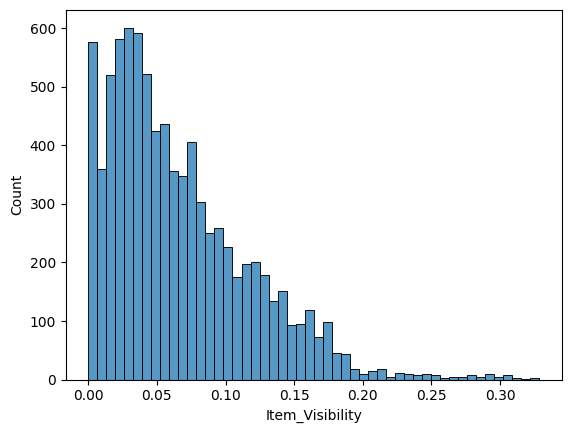

In [ ]:
ax = sns.histplot(data=df_sales, x='Item_Visibility')

Interpertation:
- There are very few items that have a high percentage of visibility in the store.
- The majority of the items in the dataset have a visibility of less than 5%
- Maybe pointing to a need to lay out the stores a bit more efficiently.

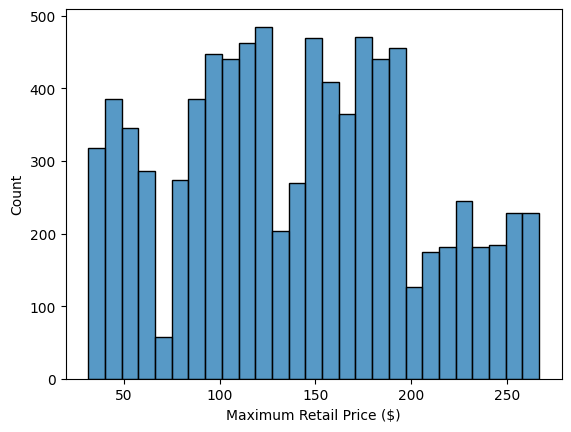

In [ ]:
ax = sns.histplot(data=df_sales, x='Item_MRP')
ax.set_xlabel("Maximum Retail Price ($)");

Interpretation:
- The majority of items are priced between $100 and $200 with a slight dip just under the $150 mark.

2. Boxplots to view statistical summaries of numerical features in your dataset.

In [ ]:
sales_stats = df_sales.describe()
sales_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,29.108765,1997.831867,2.112871,2181.288914
std,6.720742,0.051598,62.275067,13.927648,8.371760,0.812757,1706.499616
min,-1.000000,0.000000,31.290000,10.000000,1985.000000,1.000000,33.290000
25%,6.650000,0.026989,93.826500,17.000000,1987.000000,1.000000,834.247400
50%,11.000000,0.053931,143.012800,27.000000,1999.000000,2.000000,1794.331000
75%,16.000000,0.094585,185.643700,45.000000,2004.000000,3.000000,3101.296400
max,21.350000,0.328391,266.888400,49.000000,2009.000000,3.000000,13086.964800


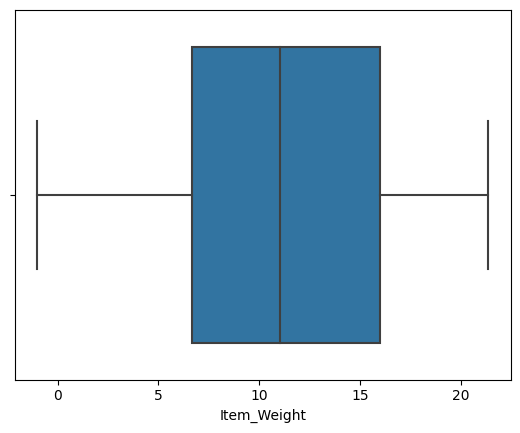

In [ ]:
ax = sns.boxplot(data=df_sales, x='Item_Weight')

Interpretation:
- Median of around 11
- Minimum value of -1
- Maximum value of around 21
- No outliers

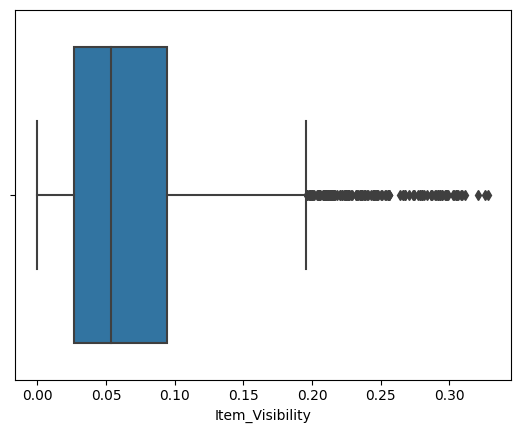

In [ ]:
ax = sns.boxplot(data=df_sales, x='Item_Visibility')

Interpretation:
- Data skewed towards the right
- Median of just over 5%
- Minimum value of 0
- Maximum value > 3%
- Lots of outliers

Text(0.5, 0, 'Maximum Retail Price ($)')

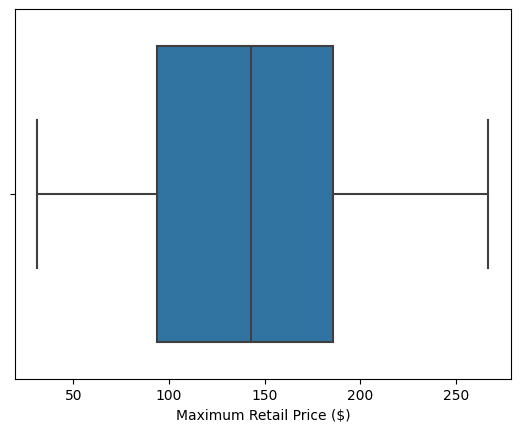

In [ ]:
ax = sns.boxplot(data=df_sales, x='Item_MRP')
ax.set_xlabel('Maximum Retail Price ($)')

Interpretation:
- Data slightly skewed towards the left
- Median of aroun $140
- Minimum value of around $30
- Maximum value around $260
- No outliers

3. Countplots to view the frequency of each class of categorial features in your dataset.

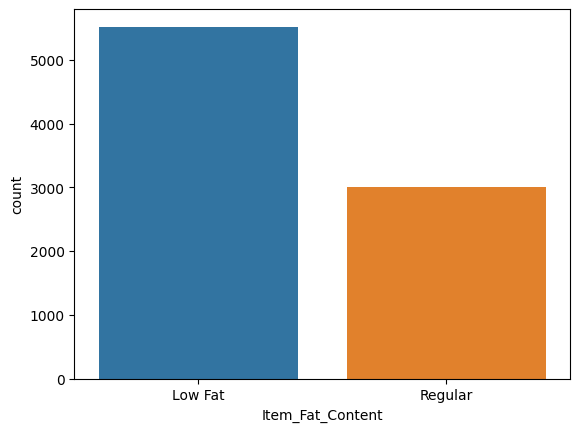

In [ ]:
ax = sns.countplot(data=df_sales, x='Item_Fat_Content')

Interpretation:
- More items with a low fat content than regular.
- Double the amount of low fat items compared to regular

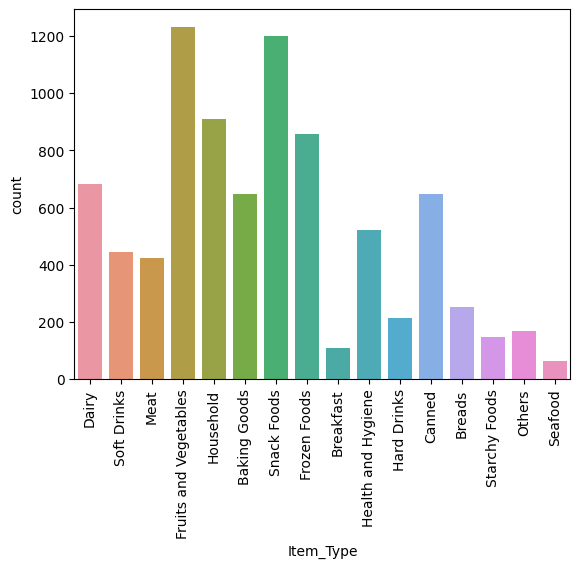

In [ ]:
ax = sns.countplot(data=df_sales, x='Item_Type')
plt.setp(ax.get_xticklabels(), rotation=90);

Interpretation:
- Items with the highest count are fruits and vegetables and snack foods
- Very few breakfast and seafood items available

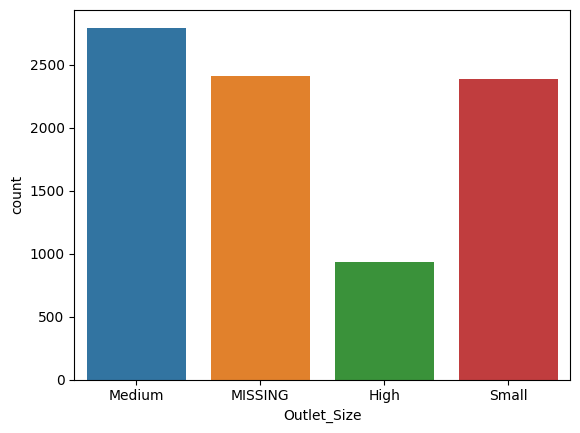

In [ ]:
ax = sns.countplot(data=df_sales, x='Outlet_Size')

Interpretation:
- There were just under 2500 entries in the dataset where the outlet size was missing
- Higest amount of items in the medium outlets (>2500)
- Only around 1000 items in the High category of outlets.

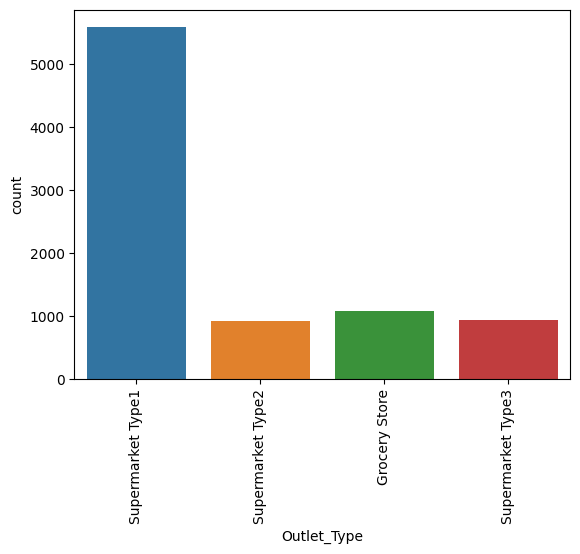

In [ ]:
ax = sns.countplot(data=df_sales, x='Outlet_Type')
plt.setp(ax.get_xticklabels(), rotation=90);

Interpretation:
- Majority of items available in Supermarket Type 1 (around 6000)
- The remainder of the items seem to be fairly distributed among the other 3 outlet types

4. Heatmap to view the correlation between features.

In [ ]:
corr = df_sales.corr(numeric_only = True)
corr.round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales
Item_Weight,1.00,-0.08,0.02,0.12,0.54,-0.07,-0.06
Item_Visibility,-0.08,1.00,-0.00,-0.11,-0.07,-0.03,-0.13
Item_MRP,0.02,-0.00,1.00,0.00,0.01,0.00,0.57
Outlet_Identifier,0.12,-0.11,0.00,1.00,0.14,-0.69,0.15
Outlet_Establishment_Year,0.54,-0.07,0.01,0.14,1.00,-0.09,-0.05
Outlet_Location_Type,-0.07,-0.03,0.00,-0.69,-0.09,1.00,0.09
Item_Outlet_Sales,-0.06,-0.13,0.57,0.15,-0.05,0.09,1.00


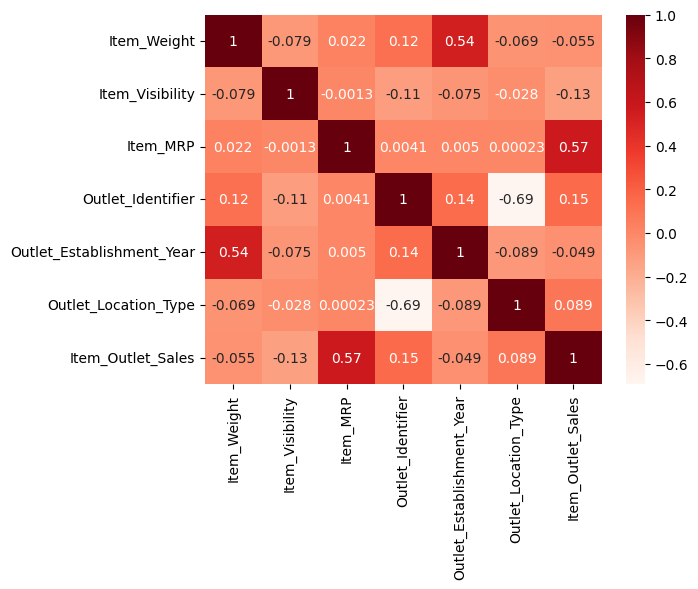

In [ ]:
ax = sns.heatmap(corr, cmap = 'Reds', annot = True)

Interpretation:
- There is a moderate positive correlation between Maximum retail price and item outlet sales (0.57)
- Moderate positive correlation between item weight and outlet establishment year (0.54)

## EDA Functions from Lessons

### Univariate EDA Functions

In [ ]:
# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:https://github.com/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/STARTER_Feature_Inspection.ipynb
         https://login.codingdojo.com/m/717/16237/120171

  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:https://github.com/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/STARTER_Feature_Inspection.ipynb
         https://login.codingdojo.com/m/717/16237/120173
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


### Multivariate Feature vs. Target Functions.

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source: https://github.com/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/STARTER_Feature_Inspection.ipynb
          https://login.codingdojo.com/m/717/16237/120172
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:https://github.com/coding-dojo-data-science/machine-learning-practice-solutions/blob/main/STARTER_Feature_Inspection.ipynb
         https://login.codingdojo.com/m/717/16237/120173
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

In [ ]:
#confirming there are no missing values
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

  - Remove the placeholders you added in week 2 and replace them with null values.

    Earlier, we replaced Item_Weight and Outlet_Size with placeholder values. We will now remove the placeholder values and replace with nulls

In [ ]:
df_sales['Item_Weight'] = df_sales['Item_Weight'].replace(-1, np.nan)

df_sales['Outlet_Size'] = df_sales['Outlet_Size'].replace("MISSING", None)

In [ ]:
#confirming that placeholder values have been replaced as before
df_sales.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Inspecting Each Feature

- Define your target column:
  - Item_Outlet_Sales

### Item_Weight

- Item_Weight:	Weight of product
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Weight"
df_sales[feature].dtype

dtype('float64')

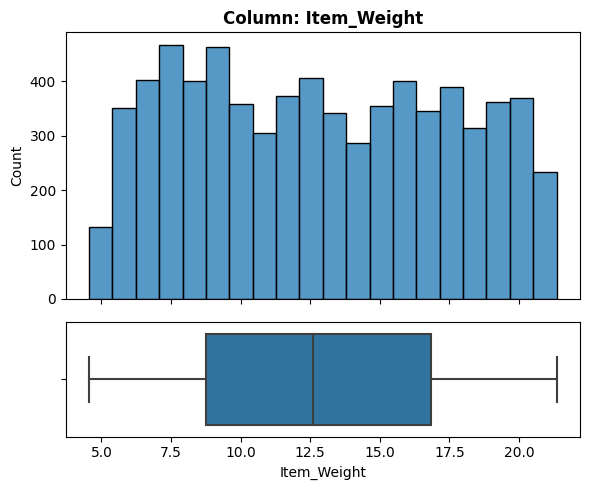

- NaN's Found: 1463 (17.17%)
- Unique Values: 415
- Most common value: 'nan' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 1463 (17.17%)
  - impute with a placeholder value

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Not applicable to numeric feature

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



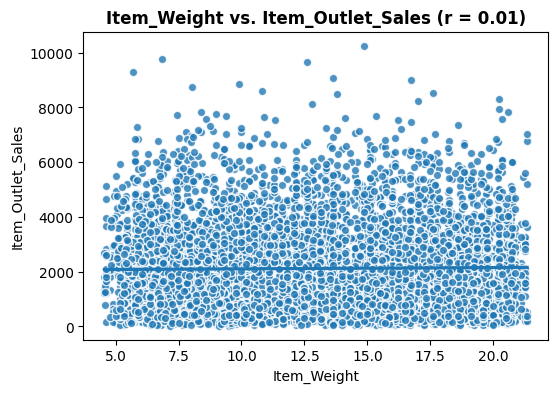

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Not Particularly
  - Does this feature appear to be a predictor of the target?
    - No, there is no correlation between Item Weight and the target.

___

### Item_Fat_Content

- Item_Fat_Content:	Whether the product is low-fat or regular
  - Low Fat
  - Regular
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Fat_Content"
df_sales[feature].dtype

dtype('O')

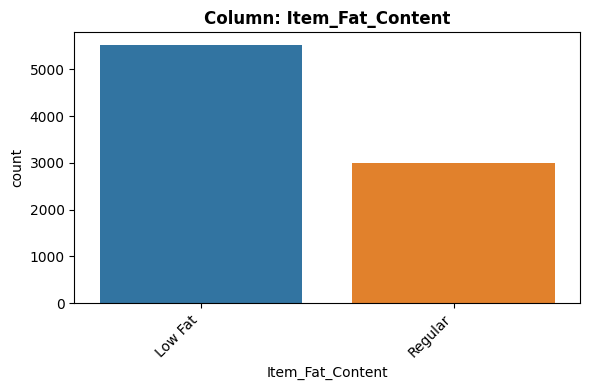

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Low (2 unique values)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



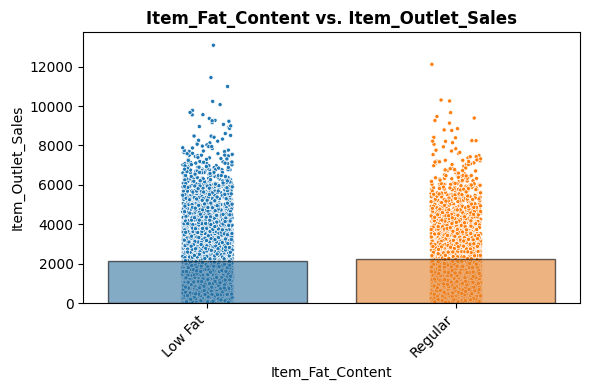

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I would think so. The fat content could be an important factor
  - Does this feature appear to be a predictor of the target?
    - Yes, the values are spread quite evenly across the 2 categories

___

### Item_Visibility

- Item_Visibility:	The percentage of total display area of all products in a store allocated to the particular product
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Visibility"
df_sales[feature].dtype

dtype('float64')

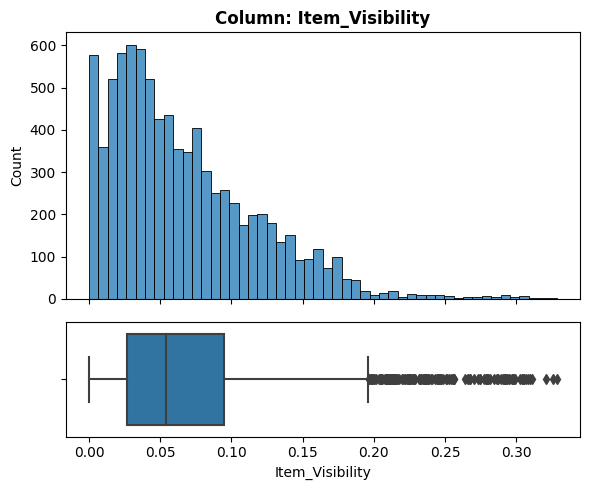

- NaN's Found: 0 (0.0%)
- Unique Values: 7880
- Most common value: '0.0' occurs 526 times (6.17%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Not applicable to numeric feature

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



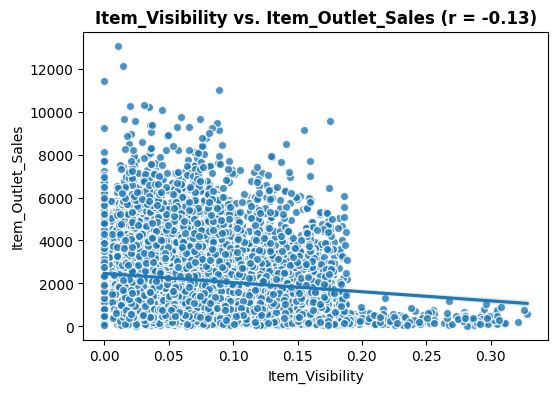

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Definitely
  - Does this feature appear to be a predictor of the target?
    - Yes, there is a negative correlation between the item Visibility and outlet sales, so as visibility increases, the sales decreases. I would have expected that higher visibility would lead to higher sales.

___

### Item_Type

- Item_Type:	The category to which the product belongs
  - Fruits and Vegetables    
  - Snack Foods              
  - Household                 
  - Frozen Foods              
  - Dairy                     
  - Canned                    
  - Baking Goods              
  - Health and Hygiene        
  - Soft Drinks               
  - Meat                      
  - Breads                    
  - Hard Drinks               
  - Others                    
  - Starchy Foods             
  - Breakfast                 
  - Seafood                    
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_Type"
df_sales[feature].dtype

dtype('O')

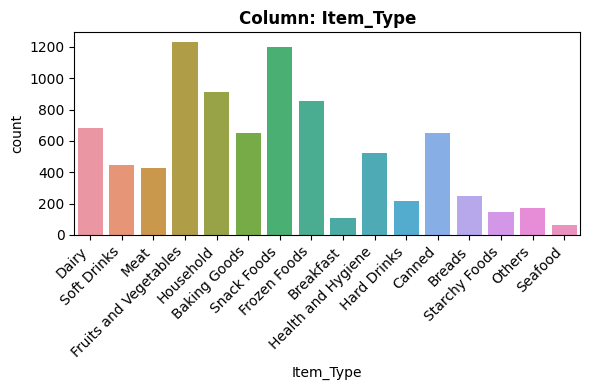

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - High (>10 unique values)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



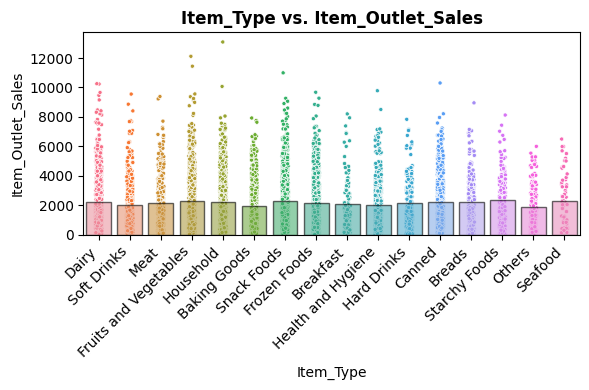

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, some items might be more popular than others
  - Does this feature appear to be a predictor of the target?
    - Yes, there is variability across all the product categories

___

### Item_MRP

- Item_MRP:	Maximum Retail Price (list price) of the product
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Item_MRP"
df_sales[feature].dtype

dtype('float64')

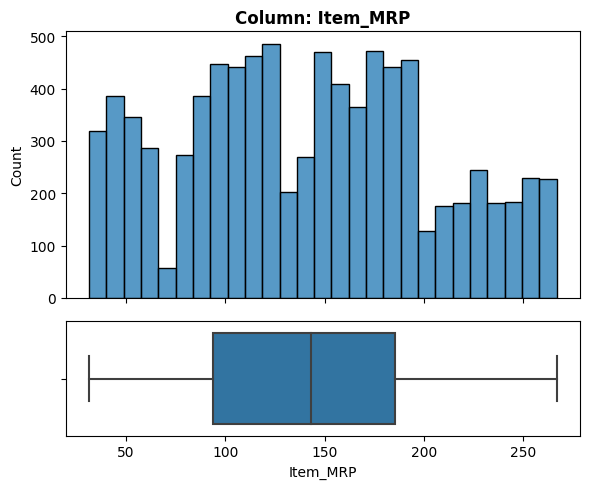

- NaN's Found: 0 (0.0%)
- Unique Values: 5938
- Most common value: '172.0422' occurs 7 times (0.08%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Not applicable to numeric feature

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



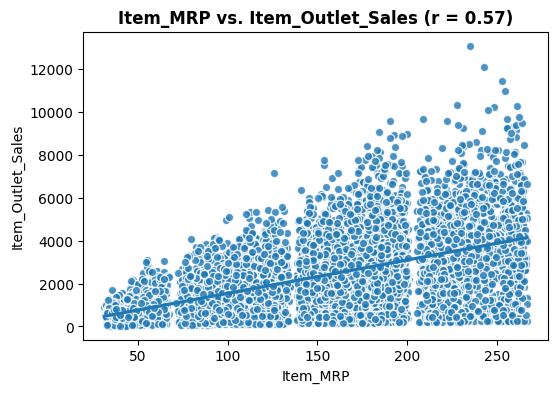

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think this feature would be one of the main predictors
  - Does this feature appear to be a predictor of the target?
    - Yes, there is positive correlation between Item_MRP and Outlet Sales.

___

### Outlet_Identifier

- Outlet_Identifier:	Store ID
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Identifier"
df_sales[feature].dtype

dtype('int64')

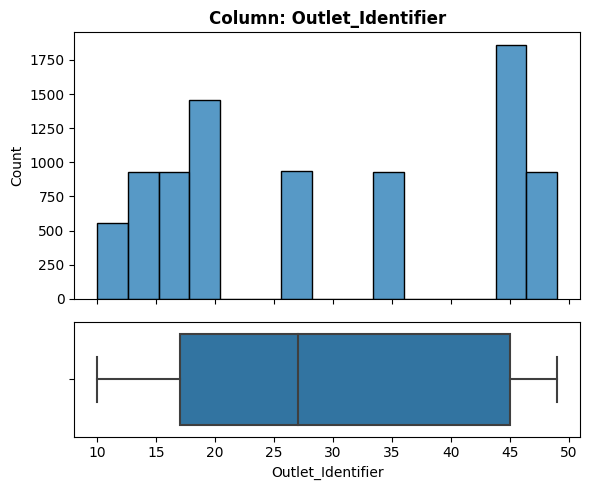

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: '27' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Not applicable to numeric feature

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes. This is just an identifying feature. Should not have any impact on sales.



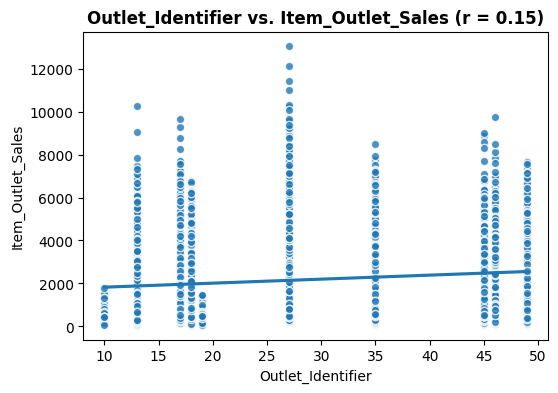

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - No, This is just an identifying feature. Should not have any impact on sales.
  - Does this feature appear to be a predictor of the target?
    - Possibly, there seems to be a very slight correlation between Outlet Identifier and Outlet Sales.

___

### Outlet_Establishment_Year

- Outlet_Establishment_Year:	The year in which store was established
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Establishment_Year"
df_sales[feature].dtype

dtype('int64')

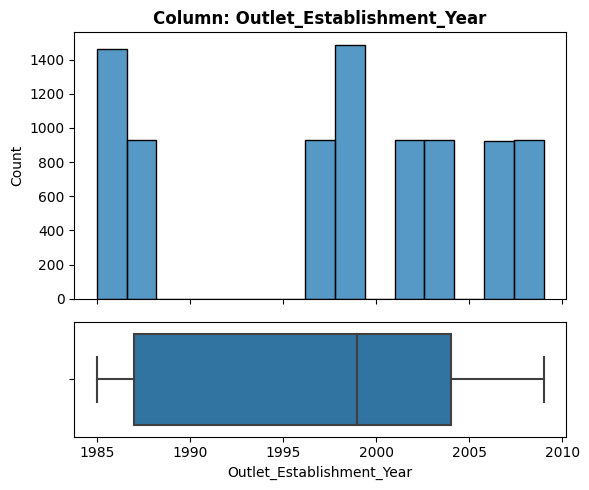

- NaN's Found: 0 (0.0%)
- Unique Values: 9
- Most common value: '1985' occurs 1463 times (17.17%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Not applicable to numeric feature

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



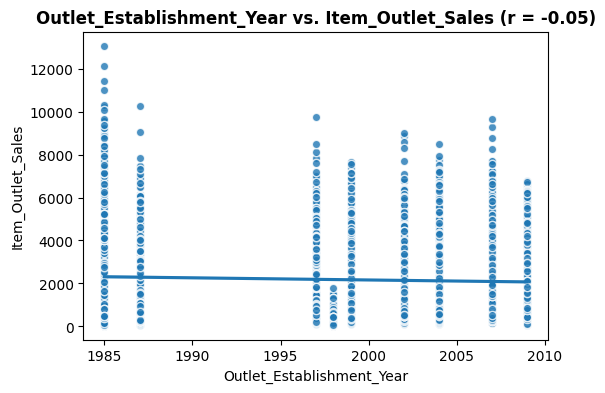

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Possibly
  - Does this feature appear to be a predictor of the target?
    - No, there is no correlation between the 2.

___

### Outlet_Size

- Outlet_Size:	The size of the store in terms of ground area covered
  - Medium
  - Small
  - High
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Size"
df_sales[feature].dtype

dtype('O')

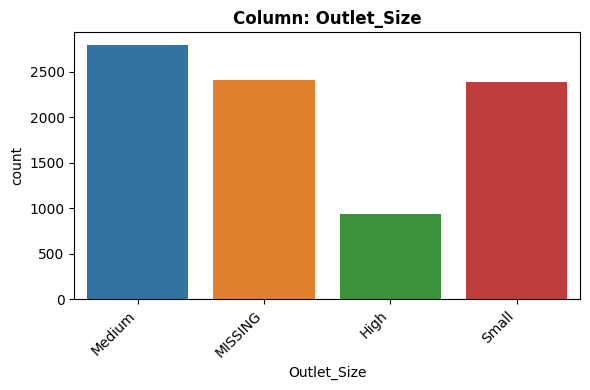

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2410 (28.28%)
  - impute with the word "MISSING"

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Low (4 unique values)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



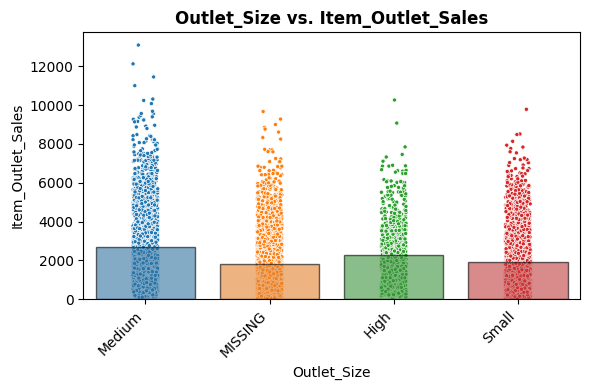

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes, the values are spread quite evenly across the 4 categories

___

### Outlet_Location_Type

- Outlet_Location_Type:	The type of area in which the store is located
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Location_Type"
df_sales[feature].dtype

dtype('int64')

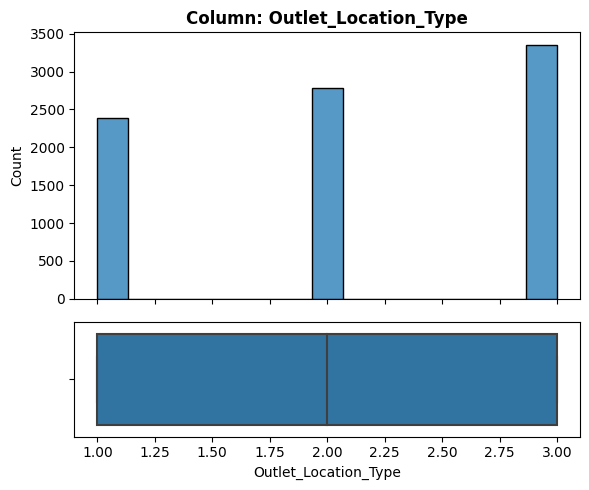

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: '3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Not applicable to numeric feature

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



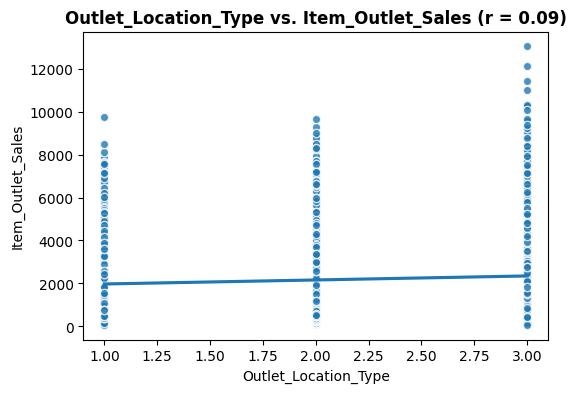

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Possibly
  - Does this feature appear to be a predictor of the target?
    - ***Seeing this as multivariate viz, I think this column is actually categorical (ordinal) and should have been left as such, i.e. not converted to numerical. I will plot it as numerical below and give my findings.***

___

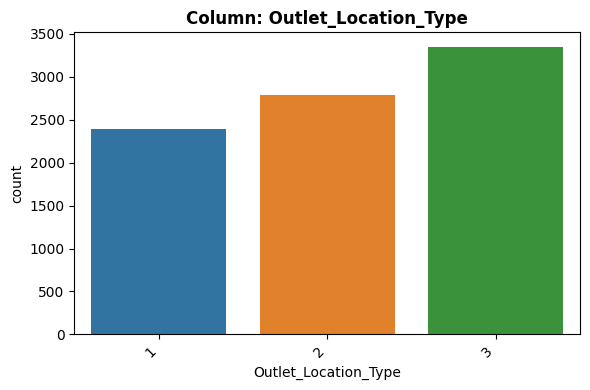

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: '3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
#Based on above this column should have been left as categorical (Tier1, Tier2, Tier3). Plotting graphs below to prove as such
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (Ordinal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Low

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



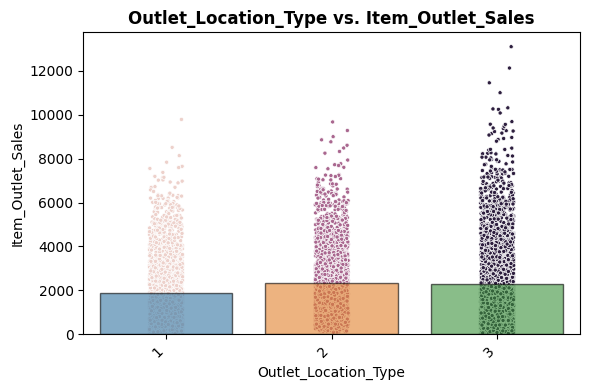

In [ ]:
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Possibly
  - Does this feature appear to be a predictor of the target?
    - Visualzing it as a categorical feature shows that it can definitely be an important predictor in Outlet Sales.

___

### Outlet_Type

- Outlet_Type:	Whether the outlet is a grocery store or some sort of supermarket
  - Supermarket Type1
  - Grocery Store
  - Supermarket Type3
  - Supermarket Type2
  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "Outlet_Type"
df_sales[feature].dtype

dtype('O')

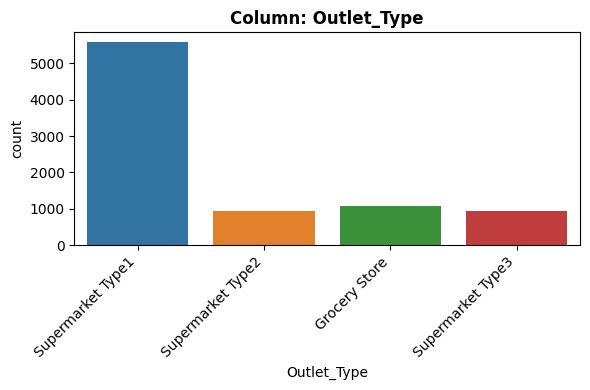

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df_sales, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 (0.0%)

3. Is the feature constant or quasi-constant?
  - Not constant or quasi-constant

4. What is the cardinality? Is it high?
  - Low (4 unique values)

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



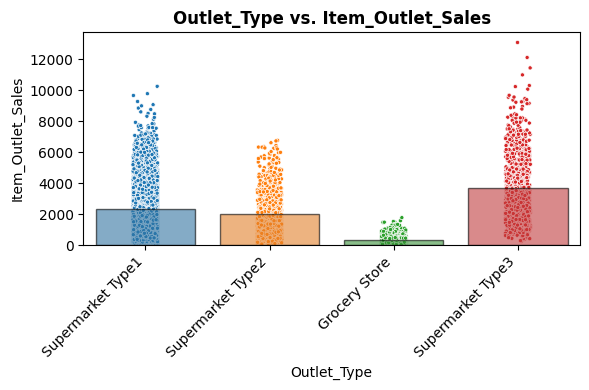

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df_sales, feature);

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes
  - Does this feature appear to be a predictor of the target?
    - Yes, there is variability across all the categories

___

#Preprocessing for machine learning

In [ ]:
df_sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df_sales_2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df_sales_2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#check for missing values which we will address later
df_sales_2.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

  - drop duplicates and fix inconsistencies in categorical data

In [ ]:
duplicated_rows = df_sales_2.duplicated()
duplicated_rows.sum()

0

In [ ]:
df_sales_2['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
#create list of object columns
obj_columns = df_sales_2.select_dtypes('object').columns
obj_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
#removing Item_Identifier from list as it is the index
obj_columns = obj_columns[1:]
obj_columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
#print value cputs for each object column
for j in obj_columns:
  # print the value counts for the column
  print(f"{j}:")
  print(df_sales_2[j].value_counts())
  # Print an empty line for readability
  print ('\n')

Item_Fat_Content:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Item_Type:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Outlet_Identifier:
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


Outlet_Size:
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


Outlet_Location_Type:
Tier 3    3350
Tier 2    27

In [ ]:
#Fix inconsistencies in Item_Fat_Content
rep_vals_2 = {"LF": "Low Fat", "reg" : "Regular", "low fat" : "Low Fat"}
df_sales_2['Item_Fat_Content'] = df_sales_2['Item_Fat_Content'].replace(rep_vals_2)
df_sales_2['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

  - Identify the features (X) and target (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.

In [ ]:
#excluding dataset index, target, and features that have no correlation with the target (as identified in feature inspection above)
X = df_sales_2.drop(columns = ['Item_Identifier', 'Item_Weight', 'Outlet_Establishment_Year', 'Item_Outlet_Sales'])

y = df_sales_2['Item_Outlet_Sales']

  -Perform a train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

display(X_train.head(), y_train.head())

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,0.029565,Household,256.4646,OUT018,Medium,Tier 3,Supermarket Type2
7510,Regular,0.000000,Snack Foods,179.7660,OUT018,Medium,Tier 3,Supermarket Type2
5828,Regular,0.158716,Meat,157.2946,OUT049,Medium,Tier 1,Supermarket Type1
5327,Low Fat,0.014628,Baking Goods,82.3250,OUT035,Small,Tier 2,Supermarket Type1
4810,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,NaN,Tier 2,Supermarket Type1


4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
Name: Item_Outlet_Sales, dtype: float64

  - Create a preprocessing object to prepare the dataset for Machine Learning

In [ ]:
#create pipeline for numeric columns - impute missing values with mean
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)

mean_imputer = SimpleImputer(strategy='mean')
num_scaler = StandardScaler()
num_pipe = make_pipeline(mean_imputer, num_scaler)
num_pipe

Numeric Columns: Index(['Item_Visibility', 'Item_MRP'], dtype='object')


Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#Create tuple
num_tuple = ('numeric', num_pipe, num_cols)
num_tuple

('numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Visibility', 'Item_MRP'], dtype='object'))

In [ ]:
#create pipeline for ordinal columns - impute missing values with most frequent
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']

freq_imputer = SimpleImputer(strategy='most_frequent')
outlet_size_order = ['Small', 'Medium', 'High']
outlet_location_order = ['Tier 1', 'Tier 2', 'Tier 3']
ordinal_category_orders = [outlet_size_order, outlet_location_order]
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
ord_scaler = StandardScaler()
ord_pipe = make_pipeline(freq_imputer, ord_encoder, ord_scaler)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [ ]:
#Create tuple
ord_tuple = ('ordinal',ord_pipe, ord_cols)
ord_tuple

('ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Small', 'Medium', 'High'],
                                             ['Tier 1', 'Tier 2', 'Tier 3']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Size', 'Outlet_Location_Type'])

In [ ]:
#create pipeline for categorical columns - impute missing values with "MISSING"
cat_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

missing_imputer = SimpleImputer(strategy='constant', fill_value='MISSING')
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
cat_pipe = make_pipeline(missing_imputer , ohe)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
#Create tuple
cat_tuple = ('categorical',cat_pipe, cat_cols)
cat_tuple

('categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='MISSING', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))

In [ ]:
#Use the tuples to create a ColumnTransformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, cat_tuple], verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
#Fit the ColumnTransformer on the training data.
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Visibility', 'Item_MRP'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1...
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [ ]:
#Transform the training data
X_train_processed = col_transformer.transform(X_train)
#Transform the test data
X_test_processed = col_transformer.transform(X_test)
#Check the transformed training data
X_train_processed.head()

,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
4776,-0.712775,1.828109,0.287374,1.084948,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7510,-1.291052,0.603369,0.287374,1.084948,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5828,1.813319,0.244541,0.287374,-1.384777,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5327,-1.004931,-0.952591,-1.384048,-0.149914,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4810,-0.965484,-0.336460,0.287374,-0.149914,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
